In [59]:
#Needed downloads & imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [60]:

Question = input("What would you like to do? \n Enter 1 to search for a recipe. \n Enter 2 to enter ingredients you want to use. \n ")

url = 'http://api.yummly.com/v1/api/recipes?_app_id=353f206c&_app_key=5b0a40b55571e0fa9b9ad4f63c774efd'
url_param1 = '&q='
url_param2 = '&allowedIngredient[]='
url_paramtime = '&maxTotalTimeInSeconds=3000'

#Searching for recipe
if Question == '1':
    recipe = input('What is the recipe you want to search?')
                   
    response = requests.get(url + url_param1 + recipe)
    recipe.replace(" ", "+")
    
    print('\n Click the link below to see all '+ recipe +' recipes from order of popularity:')
    print('https://www.yummly.com/recipes?' + url_param1 + recipe.replace(" ", "+") + '&sortBy=popular')
    print('Rerun program to search for recipes with ingredients you want to use.')

#Searching for recipes with specified ingredients

elif Question == '2':   
    i = input('What ingredients do you have? (Separate item with only spaces.) \n ')
    ingredients = list(map(str, i.split()))
    
    params2 = ''
    for ingredient in ingredients:
        params2 += url_param2 + ingredient
    
    #only show ingredients under 50 mins
    final_params2 = url + params2 + url_paramtime

    response = requests.get(final_params2)



    
    
    

What would you like to do? 
 Enter 1 to search for a recipe. 
 Enter 2 to enter ingredients you want to use. 
 chicken mushroom onion lemon


In [61]:
#show chart that shows: name, rating, time, #ofingredients
print('<RECIPE RESULTS>')
data = pd.DataFrame.from_dict(response.json()['matches'])
    
name = data['recipeName']
rate = data['rating']
data['minutes'] = data['totalTimeInSeconds']/60
#QUESTION: How to make totalTimeinSeconds to minutes

recipes_Data = data[['recipeName','rating','minutes']]
data[['recipeName','rating','minutes']]

<RECIPE RESULTS>


,recipeName,rating,minutes
0,Chicken Marsala recipe | Epicurious.com,3,50.0
1,Chicken Marsala,5,40.0
2,Detox Chicken Soup,4,30.0
3,One Pot Greek Chicken and Rice Pilaf,4,30.0
4,Copycat Recipe for Carrabba’s Chicken Marsala,4,30.0
5,Mushroom and Swiss Stuffed Chicken,4,45.0
6,30-Minute Pork Chops with Creamy Bourbon Mushr...,4,25.0
7,Creamy Mushroom Spinach Chicken,4,30.0
8,Leek and Mushroom Chicken Skillet,4,40.0
9,The BEST Chicken Fajitas,4,40.0


<RATINGS & TOTAL TIME TO MAKE>


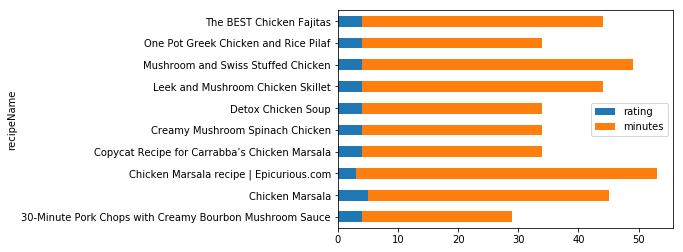

In [62]:
#View which has highest rating with takes the least time to make
print('<RATINGS & TOTAL TIME TO MAKE>')
data.groupby('recipeName').mean()[['rating','minutes']].plot(kind='barh', stacked ='True')

In [63]:
#Find how many more and which ingredients you need to buy

print('<SHOPPING LIST>')

for n, match in enumerate(response.json()['matches']):
    #Each match is a recipe dictionary
    recipe_ingredients = match['ingredients']
    needed = [item for item in recipe_ingredients if item not in ingredients]
    name = match['recipeName']
    print('\n\n',n+1, ')', name,'\n\n Number total ingredients', len(recipe_ingredients))
    print(' Number needed:', len(needed), '\n Stuff to buy:', needed)
    

<SHOPPING LIST>


 1 ) Chicken Marsala recipe | Epicurious.com 

 Number total ingredients 13
 Number needed: 13 
 Stuff to buy: ['chicken broth', 'shallot', 'unsalted butter', 'mushrooms', 'chopped fresh sage', 'salt', 'black pepper', 'all purpose flour', 'skinless boneless chicken breast halves', 'extra-virgin olive oil', 'marsala wine', 'heavy cream', 'fresh lemon juice']


 2 ) Chicken Marsala 

 Number total ingredients 12
 Number needed: 12 
 Stuff to buy: ['oil', 'chicken breasts', 'butter', 'mushrooms', 'shallot', 'garlic', 'marsala', 'chicken broth', 'lemon juice', 'salt', 'pepper', 'parsley']


 3 ) Detox Chicken Soup 

 Number total ingredients 19
 Number needed: 17 
 Stuff to buy: ['olive oil', 'skinless chicken breasts', 'kosher salt', 'freshly ground black pepper', 'carrots', 'celery', 'garlic', 'cremini mushrooms', 'dried thyme', 'dried oregano', 'chicken stock', 'bay leaves', 'orzo pasta', 'rosemary', 'kale', 'cannellini beans', 'fresh parsley leaves']


 4 ) One Pot Gr

<FLAVOR ANALYSIS OF RECIPES>
1 ) Chicken Marsala recipe | Epicurious.com
Data with flavors not available for this recipe


2 ) Chicken Marsala


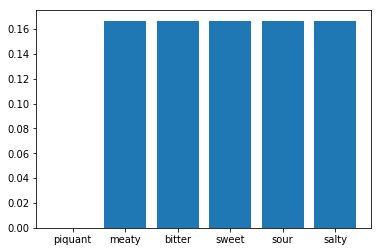

3 ) Detox Chicken Soup


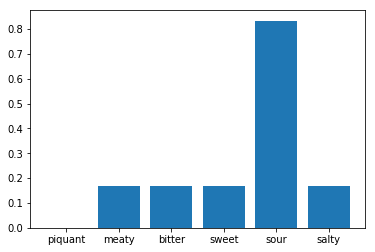

4 ) One Pot Greek Chicken and Rice Pilaf


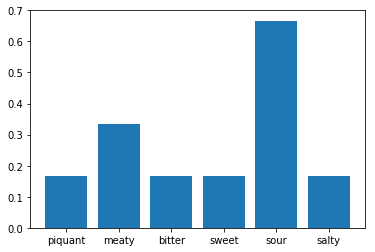

5 ) Copycat Recipe for Carrabba’s Chicken Marsala


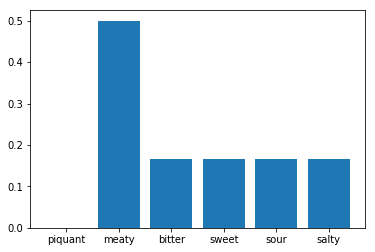

6 ) Mushroom and Swiss Stuffed Chicken


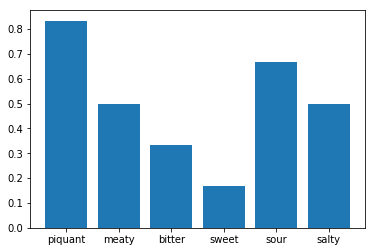

7 ) 30-Minute Pork Chops with Creamy Bourbon Mushroom Sauce


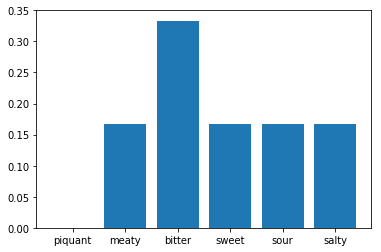

8 ) Creamy Mushroom Spinach Chicken


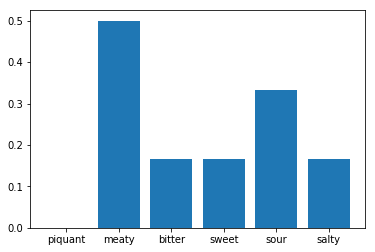

9 ) Leek and Mushroom Chicken Skillet


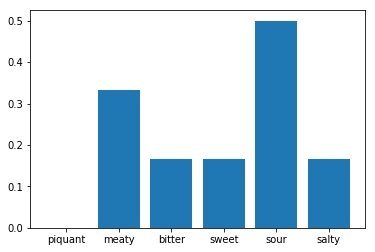

10 ) The BEST Chicken Fajitas


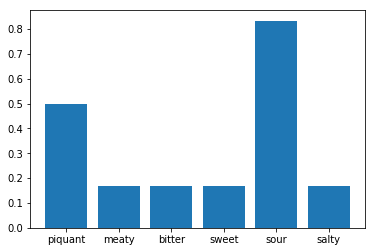

In [64]:
#Print Bar Graph of Flavors for each ingredient

print('<FLAVOR ANALYSIS OF RECIPES>')

for n, match in enumerate(response.json()['matches']):
    flavors = match['flavors']
    name = match['recipeName']
    try:
    
        print(n+1,')', name)
        recipe_flavors = match['flavors']
        flavor = list(recipe_flavors.keys())
        values = list(recipe_flavors.values())

        #tick_label does the some work as plt.xticks()
        plt.bar(range(len(recipe_flavors)),values,tick_label=flavor)
        plt.savefig('bar.png')
        plt.show()
    

    except Exception as e:
        print('Data with flavors not available for this recipe')
        print('\n')

In [65]:

for n, match in enumerate(response.json()['matches']):
    print(n+1,match['recipeName']) 

number = input('Enter the recipe number of your choice: ') 

newnumber = int(number) - 1

print ('\n\n')
print('Recipe Name:') 
print(data['recipeName'][newnumber])
print('\nRecipes Needed:') 
print(data['ingredients'][newnumber])
print('\nRating:') 
print(data['rating'][newnumber])
print('\nTotal Time in Minutes:')
print(data['minutes'][newnumber])
print('\nUrl for picture:')
print(data['smallImageUrls'][newnumber])

   

1 Chicken Marsala recipe | Epicurious.com
2 Chicken Marsala
3 Detox Chicken Soup
4 One Pot Greek Chicken and Rice Pilaf
5 Copycat Recipe for Carrabba’s Chicken Marsala
6 Mushroom and Swiss Stuffed Chicken
7 30-Minute Pork Chops with Creamy Bourbon Mushroom Sauce
8 Creamy Mushroom Spinach Chicken
9 Leek and Mushroom Chicken Skillet
10 The BEST Chicken Fajitas
Enter the recipe number of your choice: 2



Recipe Name:
Chicken Marsala

Recipes Needed:
['oil', 'chicken breasts', 'butter', 'mushrooms', 'shallot', 'garlic', 'marsala', 'chicken broth', 'lemon juice', 'salt', 'pepper', 'parsley']

Rating:
5

Total Time in Minutes:
40.0

Url for picture:
['http://lh6.ggpht.com/R02TxD9XLTVzrNDn2_QXqNe6Yyo3iO-IOl7f9RTFVEl9NK8b6Bj7XmlqSIEM0w34BQxA5bVLX_UFr4Y5tMtl=s90']
